# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import main as m

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


In [2]:
h1 = 0.1
h2 = 0.01
h3 = 0.001
t1 = np.arange(0, 1.5, h1)
t2 = np.arange(0, 1.5, h2)
t3 = np.arange(0, 1.5, h3)

In [3]:
fun1 = lambda x,t: (x+t)/(x-t)
fun1_a = lambda t: t+np.sqrt(1 + 2 * t ** 2)
x1 = np.zeros((len(t1), 1))
x2 = np.zeros((len(t2), 1))
x3 = np.zeros((len(t3), 1))
x1[0] = 1
x2[0] = 1
x3[0] = 1

y11 = m.solve_euler(fun1, t1, x1)
y12 = m.solve_euler(fun1, t2, x2)
y13 = m.solve_euler(fun1, t3, x3)

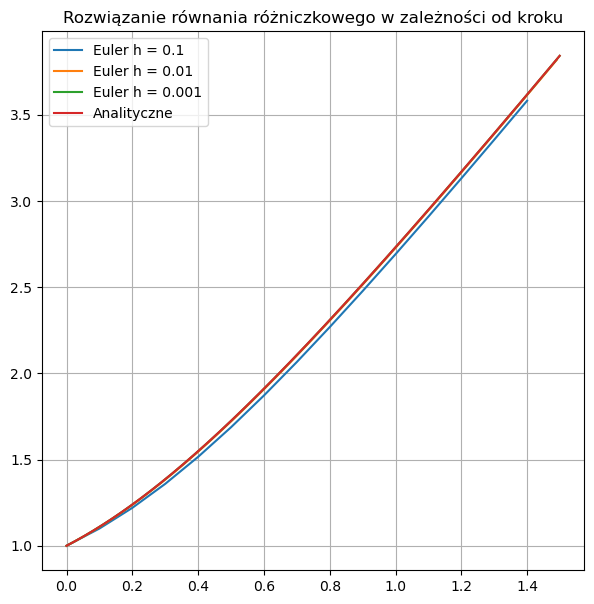

In [4]:
fig1, diff = plt.subplots(figsize=(7,7))
diff.plot(t1, y11, label=f'Euler h = {h1}')
diff.plot(t2, y12, label=f'Euler h = {h2}')
diff.plot(t3, y13, label=f'Euler h = {h3}')
diff.plot(t3, fun1_a(t3), label='Analityczne')
diff.legend()
diff.set_title('Rozwiązanie równania różniczkowego w zależności od kroku')
diff.grid()

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

In [5]:
h1 = 0.1
h2 = 0.01
h3 = 0.001
t1 = np.arange(0, 10, h1)
t2 = np.arange(0, 10, h2)
t3 = np.arange(0, 10, h3)

In [6]:
def x_prim_t(x,t):
    xp1 = x[2]
    xp2 = x[3]
    xp3 = -x[0]/((x[0] ** 2 + x[1] ** 2) ** (3/2))
    xp4 = -x[1]/((x[0] ** 2 + x[1] ** 2) ** (3/2))
    return np.array([xp1,xp2,xp3,xp4])
    
x1 = np.zeros((len(t1), 4))
x2 = np.zeros((len(t2), 4))
x3 = np.zeros((len(t3), 4))
x1[0] = [1, 0, 0, 1]
x2[0] = [1, 0, 0, 1]
x3[0] = [1, 0, 0, 1]

y21 = m.solve_euler(x_prim_t, t1, x1)
y22 = m.solve_euler(x_prim_t, t2, x2)
y23 = m.solve_euler(x_prim_t, t3, x3)

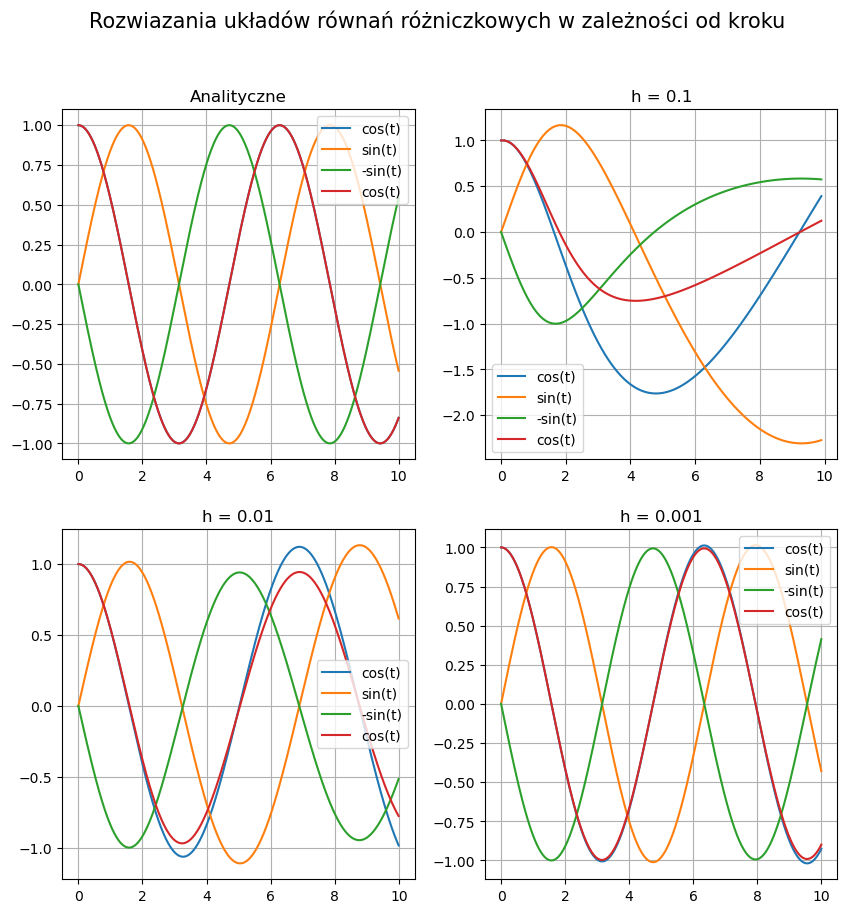

In [7]:
fig2, ((a, h11), (h22, h33)) = plt.subplots(2,2,figsize=(10,10))
fig2.suptitle('Rozwiazania układów równań różniczkowych w zależności od kroku', fontsize=15)

a.plot(t3, np.cos(t3), label='cos(t)')
a.plot(t3, np.sin(t3), label='sin(t)')
a.plot(t3, -np.sin(t3), label='-sin(t)')
a.plot(t3, np.cos(t3), label='cos(t)')
a.legend()
a.set_title('Analityczne')
a.grid()

h11.plot(t1, y21[:,0], label='cos(t)')
h11.plot(t1, y21[:,1], label='sin(t)')
h11.plot(t1, y21[:,2], label='-sin(t)')
h11.plot(t1, y21[:,3], label='cos(t)')
h11.legend()
h11.set_title(f'h = {h1}')
h11.grid()

h22.plot(t2, y22[:,0], label='cos(t)')
h22.plot(t2, y22[:,1], label='sin(t)')
h22.plot(t2, y22[:,2], label='-sin(t)')
h22.plot(t2, y22[:,3], label='cos(t)')
h22.legend()
h22.set_title(f'h = {h2}')
h22.grid()

h33.plot(t3, y23[:,0], label='cos(t)')
h33.plot(t3, y23[:,1], label='sin(t)')
h33.plot(t3, y23[:,2], label='-sin(t)')
h33.plot(t3, y23[:,3], label='cos(t)')
h33.legend()
h33.set_title(f'h = {h3}')
h33.grid()

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

In [8]:
h3 = 0.001
t3 = np.arange(0, 10, h3)
def x_matrix(x,t):
    return A @ x

In [9]:
A = np.array([[-667, 333], [666, -334]], dtype=np.float64)
x3 = np.zeros((len(t3), 2), dtype=np.float64)
x3[0] = [0, 3]

y3 = m.solve_euler(x_matrix, t3, x3)

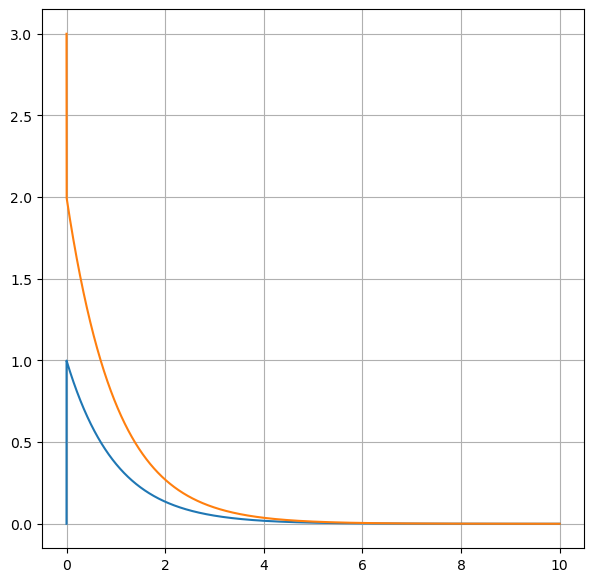

In [10]:
fig3, ax = plt.subplots(figsize=(7,7))
ax.plot(t3, y3[:,0])
ax.plot(t3, y3[:,1])
ax.grid()

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

In [11]:
def xp_4(x,t):
    mi = 0.012277471
    mip = 1 - mi
    D1 = np.power(np.power(x[0] + mi ,2) + np.power(x[2],2),3/2)
    D2 = np.power(np.power(x[0] - mip,2) + np.power(x[2],2),3/2)
    x1 = x[1]
    x2 = x[0] + 2 * x[3] - mip * (x[0] + mi) / D1 - mi * (x[0] - mip) / D2
    x3 = x[3]
    x4 = x[2] - 2 * x[1] - mip * x[2] / D1 -  mi * x[2] / D2
    return np.array([x1, x2, x3, x4])

t = np.linspace(0,17.0652165601579625588917206249,200000)
x = np.zeros((len(t),4))
x0 = [0.994,0,0,-2.00158510637908252240537862224]

x[0] = x0

y = m.solve_euler(xp_4,t,x)

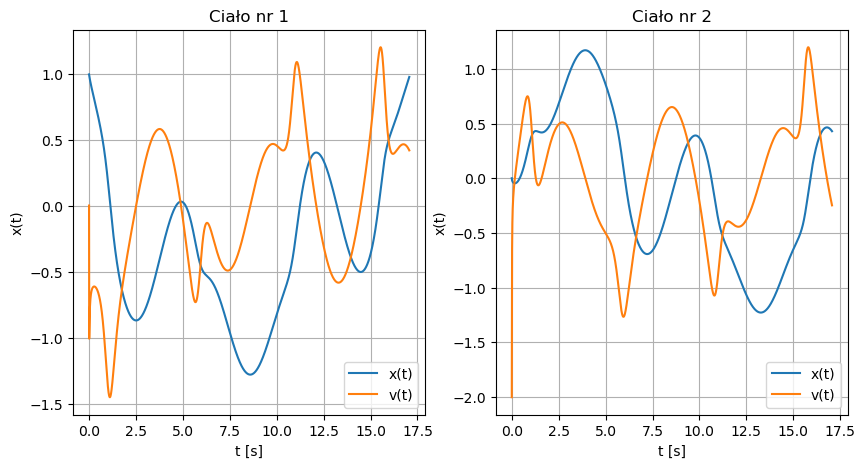

In [12]:
fig4, (c1, c2) = plt.subplots(1,2,figsize=(10,5))
c1.plot(t,x[:,0],label='x(t)')
c1.plot(t,x[:,1],label='v(t)')
c1.set(xlabel='t [s]', ylabel='x(t)')
c1.set_title('Ciało nr 1')
c1.legend()
c1.grid()

c2.plot(t,x[:,2],label='x(t)')
c2.plot(t,x[:,3],label='v(t)')
c2.set(xlabel='t [s]', ylabel='x(t)')
c2.set_title('Ciało nr 2')
c2.legend()
c2.grid()

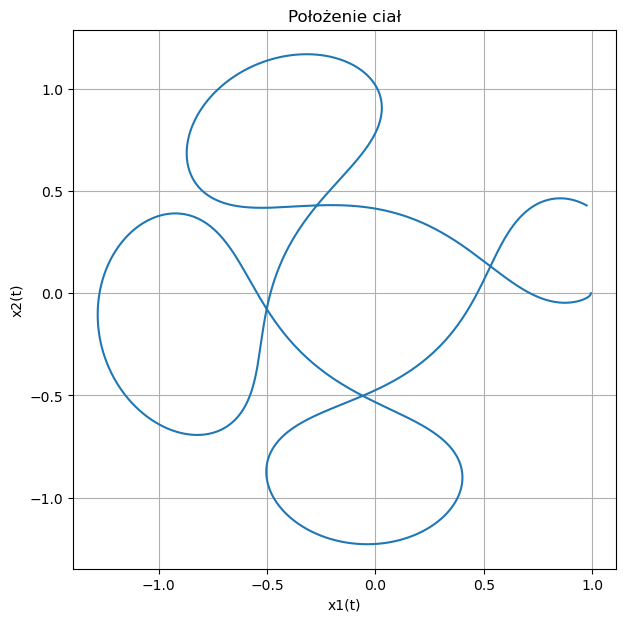

In [13]:
fig5, yn = plt.subplots(figsize=(7,7))
yn.plot(y[:,0],y[:,2])
yn.set_title('Położenie ciał')
yn.set(xlabel='x1(t)', ylabel='x2(t)')
yn.grid()

**Wnioski:**

Metoda Eulera jest jedną z wielu metod numerycznych, które umożliwiają rozwiązywanie równań różniczkowych. W metodzie Eulera wiele zależy od kroku jaki obierzemy aby rozwiązać zadane równanie. Im jest on mniejszy tym bardziej rozwiązanie numeryczne jest bliższe rzeczywistemu. Jeżeli wybierzemy zbyt duży krok nie otrzymamy sensownego rozwiązania.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
